In [1]:
!pip3 install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 6.7 MB/s 
     |████████████████████████████████| 135 kB 45.9 MB/s 
     |████████████████████████████████| 1.6 MB 46.1 MB/s 


In [2]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics
import pandas as pd
import numpy as np

import autokeras as ak

LOADING *DATA*

In [3]:
TrainDataSet= pd.read_csv('../content/milknew.csv')
TrainDataSet.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


Data analysis

In [4]:
TrainDataSet.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [5]:
import plotly.express as px
fig = px.histogram(TrainDataSet, 
                   x='Grade',
                   color = 'Grade',
                   text_auto=True,
                   color_discrete_sequence=px.colors.qualitative.G10,
                   template='simple_white',
                   labels={"Grade": "Grade"},
                   title='Grade Value Count')

fig.update_layout(bargap=0.1, xaxis_title="Grade",yaxis_title="Quantity")

fig.show()

DATA CLEANING

In [6]:
input_cols = TrainDataSet.columns[:-1]
input_cols

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype='object')

In [7]:
target_col =  TrainDataSet.columns[-1]
target_col

'Grade'

In [8]:
inputs_df = TrainDataSet[list(input_cols)].copy()
inputs_df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [9]:
targets = TrainDataSet[(target_col)]
targets

0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object

AUTOML MODEL

In [10]:
import tensorflow as tf
import os
from sklearn.datasets import load_files
import autokeras as ak

In [11]:
#separo datps de las etiquetas de los resultados


x = inputs_df

y = np.array(targets)


#separo datos en trainig y test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.2)

x_train = np.array(X_train)
y_train = np.array(y_train)
x_test = np.array(X_test)
y_test = np.array(y_test)



print(x_train,y_train)

[[  6.8  40.    1.  ...   1.    0.  245. ]
 [  6.8  34.    0.  ...   0.    1.  240. ]
 [  9.   43.    1.  ...   1.    1.  250. ]
 ...
 [  9.5  34.    1.  ...   0.    1.  255. ]
 [  6.8  36.    0.  ...   1.    0.  253. ]
 [  9.   43.    1.  ...   1.    1.  248. ]] ['medium' 'medium' 'low' 'low' 'medium' 'low' 'low' 'medium' 'low'
 'medium' 'medium' 'medium' 'high' 'high' 'medium' 'high' 'low' 'medium'
 'low' 'high' 'medium' 'low' 'medium' 'low' 'high' 'low' 'medium' 'medium'
 'high' 'medium' 'medium' 'low' 'medium' 'low' 'high' 'high' 'low' 'low'
 'low' 'medium' 'medium' 'medium' 'low' 'high' 'low' 'high' 'low' 'low'
 'medium' 'low' 'medium' 'low' 'low' 'medium' 'medium' 'medium' 'low'
 'low' 'low' 'high' 'medium' 'low' 'low' 'low' 'medium' 'high' 'low' 'low'
 'high' 'medium' 'medium' 'medium' 'low' 'medium' 'low' 'low' 'medium'
 'high' 'medium' 'low' 'high' 'medium' 'medium' 'high' 'high' 'high' 'low'
 'high' 'low' 'high' 'low' 'low' 'medium' 'medium' 'low' 'medium' 'high'
 'low' 'medi

In [12]:
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3]) 

(847, 7)
(847,)
['medium' 'medium' 'low']


In [13]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data classifier with training data.
history = clf.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

Trial 3 Complete [00h 00m 06s]
val_accuracy: 0.8915094137191772

Best val_accuracy So Far: 0.9386792182922363
Total elapsed time: 00h 00m 20s
Epoch 1/10
27/27 [==============================] - 1s 12ms/step - loss: 0.9018 - accuracy: 0.5950 - val_loss: 0.7794 - val_accuracy: 0.6132
Epoch 2/10
27/27 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.6777 - val_loss: 0.6286 - val_accuracy: 0.6557
Epoch 3/10
27/27 [==============================] - 0s 6ms/step - loss: 0.5590 - accuracy: 0.7686 - val_loss: 0.5218 - val_accuracy: 0.8443
Epoch 4/10
27/27 [==============================] - 0s 5ms/step - loss: 0.4685 - accuracy: 0.8571 - val_loss: 0.4318 - val_accuracy: 0.8774
Epoch 5/10
27/27 [==============================] - 0s 7ms/step - loss: 0.3959 - accuracy: 0.8890 - val_loss: 0.3532 - val_accuracy: 0.9057
Epoch 6/10
27/27 [==============================] - 0s 6ms/step - loss: 0.3359 - accuracy: 0.8973 - val_loss: 0.2906 - val_accuracy: 0.9340
Epoch 7/10
27/27 

evaluar red

In [14]:
res = clf.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1634 - accuracy: 0.9764


Predecir nuevos resultados

In [15]:
y_pred = clf.predict(x_test)

for i in range(50):
  print("valor real: ", y_test[i])
  print("valor estimado: ", y_pred[i])
  print("---------------------------------- ")

7/7 [==============================] - 0s 2ms/step
valor real:  medium
valor estimado:  ['medium']
---------------------------------- 
valor real:  low
valor estimado:  ['medium']
---------------------------------- 
valor real:  high
valor estimado:  ['high']
---------------------------------- 
valor real:  low
valor estimado:  ['low']
---------------------------------- 
valor real:  high
valor estimado:  ['high']
---------------------------------- 
valor real:  low
valor estimado:  ['low']
---------------------------------- 
valor real:  high
valor estimado:  ['high']
---------------------------------- 
valor real:  medium
valor estimado:  ['medium']
---------------------------------- 
valor real:  high
valor estimado:  ['high']
---------------------------------- 
valor real:  low
valor estimado:  ['low']
---------------------------------- 
valor real:  medium
valor estimado:  ['medium']
---------------------------------- 
valor real:  medium
valor estimado:  ['medium']
--------------

Curva de aprendizaje

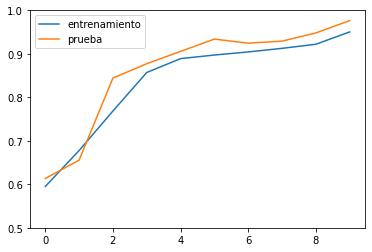

[0.5950413346290588, 0.6776859760284424, 0.7685950398445129, 0.8571428656578064, 0.8890200853347778, 0.8972845077514648, 0.9043683409690857, 0.9126328229904175, 0.9220778942108154, 0.9504132270812988]


In [19]:
from matplotlib import pyplot
f, ax = pyplot.subplots()
ax.set_ylim(bottom=0.5)
ax.plot(history.history['accuracy'], label='entrenamiento')
ax.plot(history.history['val_accuracy'], label='prueba')
pyplot.legend()
pyplot.show(f)
print(history.history['accuracy'])